In [1]:
import numpy as np
import pandas as pd

In [49]:
import csv as cv
import os
import matplotlib.pyplot as plt
import re
import csv
import time
import pandas as pd
from pandas import Series
from random import randint
from scipy.signal import correlate
from sklearn.metrics import r2_score
from statsmodels.formula.api import ols
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,cross_val_predict
import warnings
warnings.filterwarnings('ignore')


### PART 1
#### Point 1.1
Process the Wikipedia pageview data for the "Influenza" page of the Italian
Wikipedia (https://it.wikipedia.org/wiki/Influenza), aggregate the pageviews
on a weekly time scale, and plot the resulting time series of page views
for the current year and - ideally - also for previous years.

In [3]:
Ground_Truth_Path="./Influent/Inf"
Wiki_Data_Path="./DEDATA/HWDE/Wiki/"

In [255]:
import os
#list_years = ["2003-2004","2004-2005","2005-2006","2006-2007","2007-2008","2008-2009","2009-2010","2010-2011","2011-2012","2012-2013"]
#this part we get the ground truth data
list_years = ["2015-2016","2016-2017","2017-2018"]
def data_ground_truth_aggregator(path):
    df_list = []
    for year in list_years:
        g_data = pd.read_csv(path+str(year)+'.csv',usecols=['Incidenza'])
        g_data = g_data.dropna()
        #g_data = g_data.set_index("Settimana")
        #g_data.index=[g_data.index.str.split('-')[i][1] for i in range(140)]
        df_list.append(g_data)      
    result = pd.concat(df_list, axis = 1)
    result.columns = list_years
    return result


gdf=data_ground_truth_aggregator(Ground_Truth_Path)

In [256]:
gdf.head()

,2015-2016,2016-2017,2017-2018
0,0.40,0.59,0.89
1,0.50,0.71,0.85
2,0.68,0.81,0.95
3,0.76,0.98,1.24
4,0.88,1.25,1.60


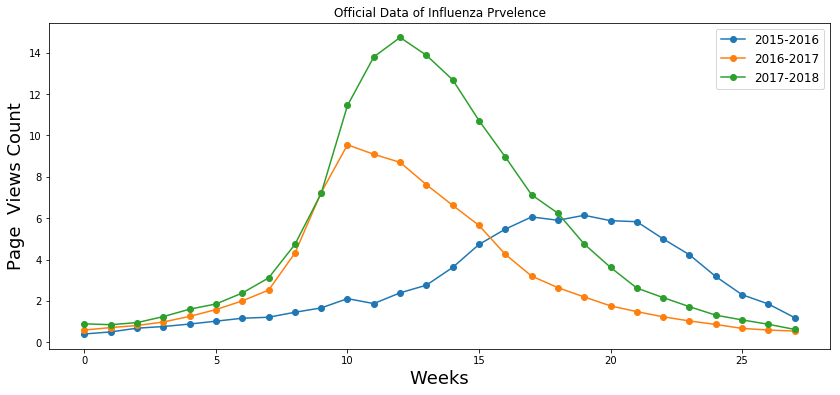

In [258]:
plt.figure(figsize=(14,6))
plt.plot([( row['2015-2016'], row['2016-2017'],row['2017-2018']
          ) for index, row in gdf.iterrows()], 'o-')
plt.xlabel('Weeks', fontsize=18)
plt.ylabel('Page  Views Count', fontsize=18)
plt.title('Official Data of Influenza Prvelence')
plt.legend(['2015-2016', '2016-2017', '2017-2018'], fontsize=12, loc='upperleft')
plt.show()

#### ----------------------------------------------------------------------------------------------------------------------------------------------------

### Part 2
### Point 2.1
Try to find other Wikipedia pages related to flu whose pageview time series
	are correlated with the Influnet signal. For example, you could consider
	the pages linked from the "Influenza" page, such as symptom pages:
		- https://it.wikipedia.org/wiki/Febbre
		- https://it.wikipedia.org/wiki/Rinorrea
		- https://it.wikipedia.org/wiki/Mialgia
		- https://it.wikipedia.org/wiki/Cefalea
		- https://it.wikipedia.org/wiki/Vomito
	pages corresponding to medications for fever:
		- https://it.wikipedia.org/wiki/Paracetamolo
	and pages devoted to flu vaccines:
		- https://it.wikipedia.org/wiki/Vaccino_antinfluenzale#Vaccino_influenza_stagionale
	Use any strategy you think is appropriate to choose these pages.
	Compute their weekly pageview time series for the last year
	and - if possible - for the previous years,
	and plot them together with the Influnet signal as in 1.1.

In [4]:
pages_names=['Influenza','Febbre','Rinorrea','Mialgia','Cefalea','Vomito','Vaccino influenza stagionale',
             'Vaccino antinfluenzale','Amantadina','Antivirale','Artralgia','Influenza aviaria','Influenzavirus A',
             'Influenzavirus A sottotipo H1N1','Virus dell\'influenza A sottotipo H1N1',
             'Zanamivir','Influenza spagnola','Influenza e fortuna del pensiero di Nietzsche']

In [188]:
#keywords=['Date','Influenza','Febbre','Rinorrea','Mialgia','Cefalea','Vomito','Vaccino influenza stagionale','Vaccino antinfluenzale','Amantadina','Antivirale']
def data_wiki_pageviews_aggregator(paths):
    result=pd.DataFrame()
    for path in paths:
        g_data = pd.read_csv(path)
        '''here you have to add the date column'''
        g_data = g_data.dropna()
        result=pd.concat([result,g_data],axis=1)
        result= result.loc[:,~result.columns.duplicated()]
    return result

paths=['2018I10.csv','2018A10.csv','2017I10.csv','2017A10.csv','2016I10.csv','2016A10.csv','2015I10.csv','2015A10.csv']
data2018=data_wiki_pageviews_aggregator(paths[0:2])
data2017=data_wiki_pageviews_aggregator(paths[2:4])
data2016=data_wiki_pageviews_aggregator(paths[4:6])
data2015=data_wiki_pageviews_aggregator(paths[6:8])

In [229]:
data2018.dropna().head(3)

,Date,Influenza,Febbre,Rinorrea,Mialgia,Cefalea,Vomito,Vaccino influenza stagionale,Vaccino antinfluenzale,Amantadina,Antivirale,Artralgia,Influenza aviaria,Influenzavirus A,Influenzavirus A sottotipo H1N1,Virus dell'influenza A sottotipo H1N1,Zanamivir,Influenza spagnola,Influenza e fortuna del pensiero di Nietzsche
0,2018-01-01,528.0,666.0,47.0,93.0,192.0,210.0,0.0,79.0,34.0,70.0,40,127,56,179,18,15,457,8
1,2018-01-02,719.0,927.0,80.0,123.0,254.0,212.0,0.0,82.0,57.0,71.0,64,144,60,179,11,15,522,12
2,2018-01-03,890.0,923.0,54.0,144.0,253.0,186.0,0.0,95.0,70.0,74.0,85,195,82,301,22,29,1070,12


In [189]:
def week_scale(data):
    data['Date'] = pd.to_datetime(data['Date'])
    data=data.resample('7D', on='Date').sum()
    return data

In [190]:
data2018=week_scale(data2018.dropna())
data2017=week_scale(data2017.dropna())
data2016=week_scale(data2016.dropna())
data2015=week_scale(data2015.dropna())

In [339]:
data2018.head(5)

,Influenza,Febbre,Rinorrea,Mialgia,Cefalea,Vomito,Vaccino influenza stagionale,Vaccino antinfluenzale,Amantadina,Antivirale,Artralgia,Influenza aviaria,Influenzavirus A,Influenzavirus A sottotipo H1N1,Virus dell'influenza A sottotipo H1N1,Zanamivir,Influenza spagnola,Influenza e fortuna del pensiero di Nietzsche
Date,,,,,,,,,,,,,,,,,,
2018-01-01,5902.0,5962.0,453.0,1092.0,1801.0,1300.0,3.0,692.0,401.0,527.0,662,1706,578,7146,167,198,4672,89
2018-01-08,5369.0,5287.0,452.0,983.0,2367.0,1161.0,9.0,642.0,503.0,535.0,592,1361,667,3623,144,181,3354,143
2018-01-15,4954.0,4643.0,531.0,832.0,2040.0,1097.0,3.0,818.0,500.0,472.0,530,1309,547,2626,128,160,4038,150
2018-01-22,4009.0,4810.0,524.0,863.0,1982.0,1220.0,4.0,502.0,536.0,406.0,501,1254,555,2338,141,159,3925,142
2018-01-29,3671.0,4259.0,373.0,936.0,2034.0,1182.0,1.0,466.0,506.0,435.0,462,1408,505,2158,122,159,3580,140


In [30]:
all_year_data=pd.concat([data2015,data2016,data2017,data2018])

In [185]:
all_year_data.head(3)

,Influenza,Febbre,Rinorrea,Mialgia,Cefalea,Vomito,Vaccino influenza stagionale,Vaccino antinfluenzale,Amantadina,Antivirale,Artralgia,Influenza aviaria,Influenzavirus A,Influenzavirus A sottotipo H1N1,Virus dell'influenza A sottotipo H1N1,Zanamivir,Influenza spagnola,Influenza e fortuna del pensiero di Nietzsche
Date,,,,,,,,,,,,,,,,,,
2015-07-01,689.0,2597.0,327.0,1051.0,2094.0,1706.0,3.0,113.0,460.0,345.0,580,360,124,257,38,61,1077,255
2015-07-08,702.0,2694.0,342.0,962.0,1984.0,1654.0,7.0,129.0,463.0,302.0,567,520,137,232,35,69,1030,99
2015-07-15,569.0,2772.0,301.0,883.0,1908.0,1729.0,3.0,137.0,454.0,298.0,516,403,114,214,53,72,847,81


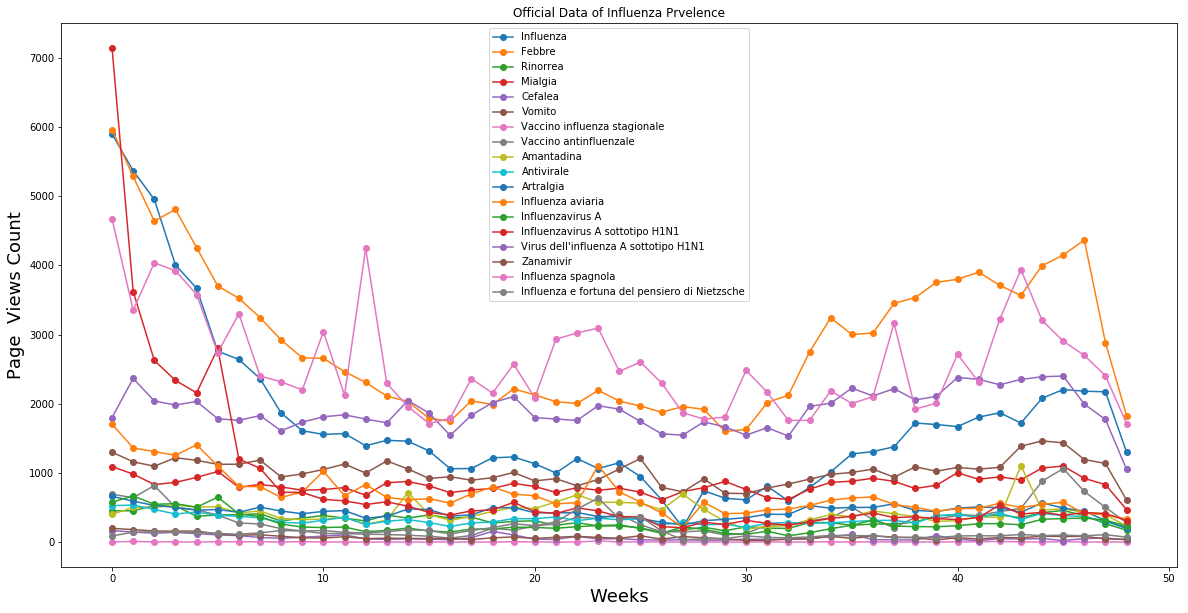

In [186]:
plt.figure(figsize=(20,10))
plt.plot([( row['Influenza'], row['Febbre'], row['Rinorrea'],row['Mialgia'],row['Cefalea'],
            row['Vomito'], row['Vaccino influenza stagionale'], row['Vaccino antinfluenzale'],row['Amantadina'],row['Antivirale'],
            row['Artralgia'], row['Influenza aviaria'], row['Influenzavirus A'],row['Influenzavirus A sottotipo H1N1'],row['Virus dell\'influenza A sottotipo H1N1'],
            row['Zanamivir'], row['Influenza spagnola'], row['Influenza e fortuna del pensiero di Nietzsche']
          ) for index, row in data2018.iterrows()], 'o-')
plt.xlabel('Weeks', fontsize=18)
plt.ylabel('Page  Views Count', fontsize=18)
plt.title('Official Data of Influenza Prvelence')
plt.legend(pages_names, fontsize=10, loc='upperleft')
plt.show()

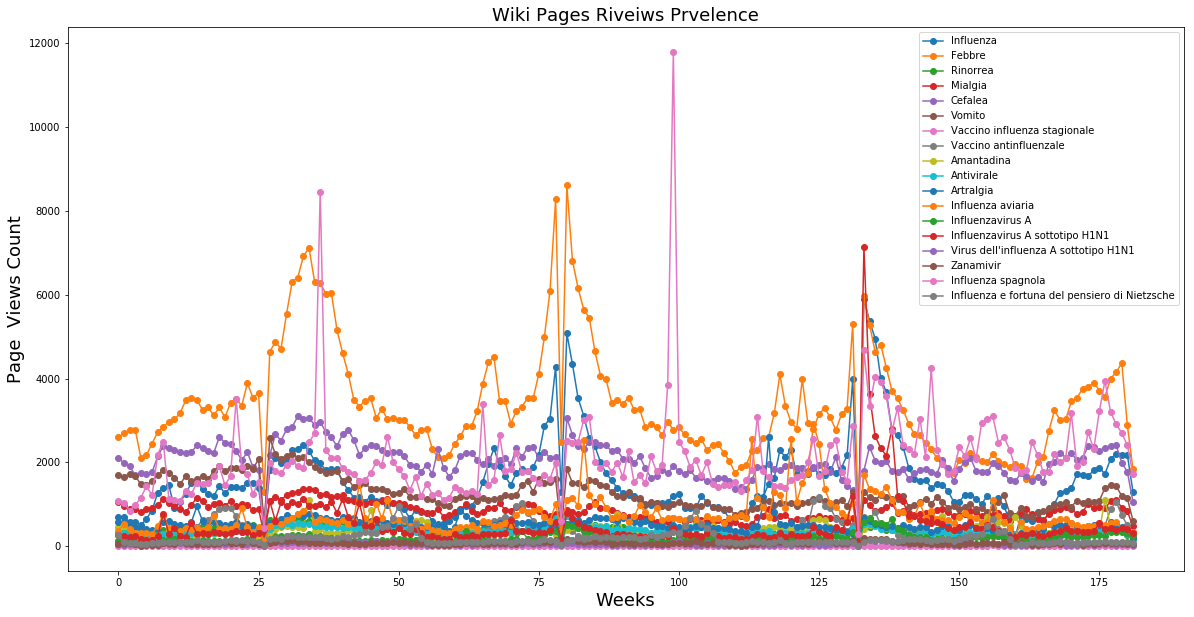

In [193]:
plt.figure(figsize=(20,10))
plt.plot([( row['Influenza'], row['Febbre'], row['Rinorrea'],row['Mialgia'],row['Cefalea'],
            row['Vomito'], row['Vaccino influenza stagionale'], row['Vaccino antinfluenzale'],row['Amantadina'],row['Antivirale'],
            row['Artralgia'], row['Influenza aviaria'], row['Influenzavirus A'],row['Influenzavirus A sottotipo H1N1'],row['Virus dell\'influenza A sottotipo H1N1'],
            row['Zanamivir'], row['Influenza spagnola'], row['Influenza e fortuna del pensiero di Nietzsche']
          ) for index, row in all_year_data.iterrows()], 'o-')
plt.xlabel('Weeks', fontsize=18)
plt.ylabel('Page  Views Count', fontsize=18)
plt.title('Wiki Pages Riveiws Prvelence', fontsize=18)
plt.legend(pages_names, fontsize=10, loc='upperleft')
plt.show()

    2.2 - For each of the selected Wikipedia pages, compute the same correlation
	with the Influnet time series that you computed in 1.2.
	Which of these correlations are strongest ?
	Did you discover a better page than "Influenza"
	in terms of correlation with the ground truth ?

#### To compute the correlation we have to remove weeks from data that are not in official data

In [191]:
weeks_numbers=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,42,43,44,45,46,47,48,49,50,51,52,53]

In [192]:
def get_official_week(data,weeks_numbers):
    d=pd.DataFrame(pd.Series([i for i in range(1,len(data)+1)]))
    data['weeknum'] = d.iloc[:,0].values
    data=data.loc[data.weeknum.isin(weeks_numbers)]
    return data

In [193]:
data2018=get_official_week(data2018,weeks_numbers)
data2017=get_official_week(data2017,weeks_numbers)
data2016=get_official_week(data2016,weeks_numbers)

In [194]:
data2015=data2015[15:]

In [195]:
data2015['weeknum']=['2015-'+str(i) for i in range(42,54)]

In [196]:
data2018=data2018[0:17]
data2018.weeknum=['2018-'+str(data2018.weeknum[i]) for i in range(len(data2018))]

In [197]:
data2016.weeknum=['2016-'+str(data2016.weeknum[i]) for i in range(len(data2016))]

In [198]:
data2017.weeknum=['2017-'+str(data2017.weeknum[i]) for i in range(len(data2017))]

In [39]:
all_year_data=pd.concat([data2015,data2016,data2017,data2018])

In [358]:
all_year_data.head(3)

,Influenza,Febbre,Rinorrea,Mialgia,Cefalea,Vomito,Vaccino influenza stagionale,Vaccino antinfluenzale,Amantadina,Antivirale,Artralgia,Influenza aviaria,Influenzavirus A,Influenzavirus A sottotipo H1N1,Virus dell'influenza A sottotipo H1N1,Zanamivir,Influenza spagnola,Influenza e fortuna del pensiero di Nietzsche,weeknum
Date,,,,,,,,,,,,,,,,,,,
2015-10-14,1353.0,3253.0,487.0,1077.0,2330.0,1680.0,9.0,623.0,277.0,305.0,604,377,135,306,109,58,1478,103,2015-42
2015-10-21,1255.0,3313.0,404.0,930.0,2277.0,1590.0,1.0,617.0,282.0,300.0,471,445,119,296,47,58,1511,95,2015-43
2015-10-28,1194.0,3119.0,420.0,1004.0,2218.0,1796.0,8.0,755.0,293.0,309.0,586,722,130,340,41,52,1671,87,2015-44


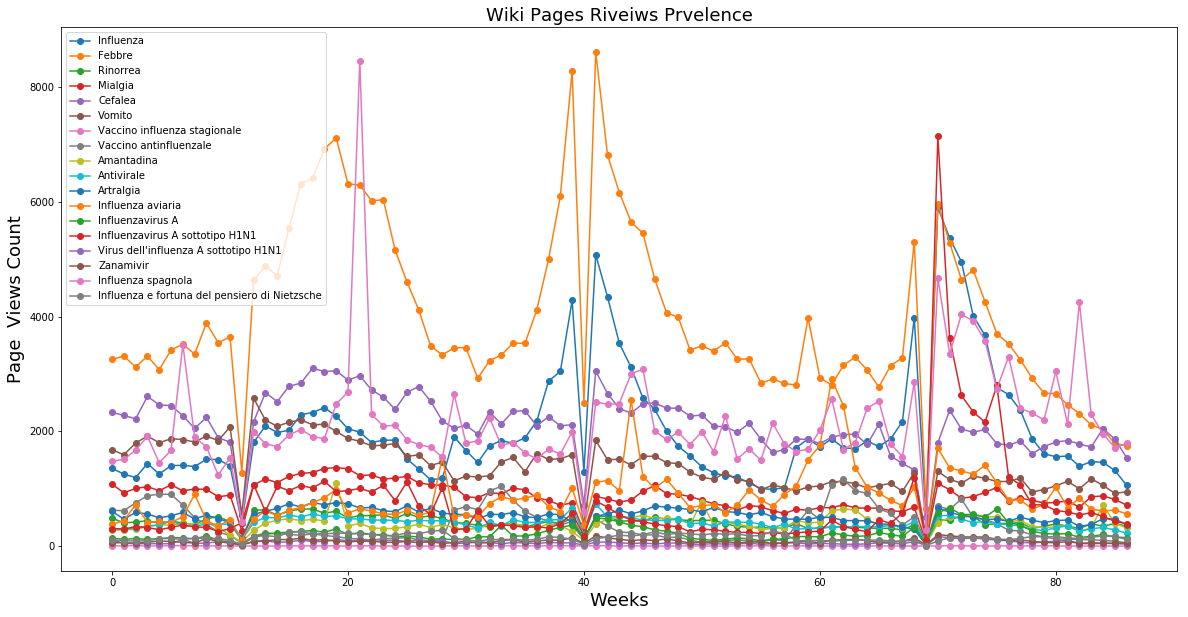

In [359]:
plt.figure(figsize=(20,10))
plt.plot([( row['Influenza'], row['Febbre'], row['Rinorrea'],row['Mialgia'],row['Cefalea'],
            row['Vomito'], row['Vaccino influenza stagionale'], row['Vaccino antinfluenzale'],row['Amantadina'],row['Antivirale'],
            row['Artralgia'], row['Influenza aviaria'], row['Influenzavirus A'],row['Influenzavirus A sottotipo H1N1'],row['Virus dell\'influenza A sottotipo H1N1'],
            row['Zanamivir'], row['Influenza spagnola'], row['Influenza e fortuna del pensiero di Nietzsche']
          ) for index, row in all_year_data.iterrows()], 'o-')
plt.xlabel('Weeks', fontsize=18)
plt.ylabel('Page  Views Count', fontsize=18)
plt.title('Wiki Pages Riveiws Prvelence', fontsize=18)
plt.legend(pages_names, fontsize=10, loc='upperleft')
plt.show()

In [50]:
def get_correlated_with_Influenza(data,pages_names):
    corr=dict()
    for name in pages_names[1:len(pages_names)]:
        corr[name]=np.corrcoef(data[name],data['Influenza'])[0,1]
    return corr

In [51]:
corr=get_correlated_with_Influenza(all_year_data,pages_names)

In [52]:
corr=pd.DataFrame.from_dict(corr,orient='index')

In [54]:
corr.sort_values(0, ascending=False).transpose()

,Influenzavirus A,Zanamivir,Influenzavirus A sottotipo H1N1,Febbre,Antivirale,Virus dell'influenza A sottotipo H1N1,Influenza spagnola,Influenza aviaria,Rinorrea,Vaccino influenza stagionale,Amantadina,Cefalea,Vaccino antinfluenzale,Mialgia,Artralgia,Vomito,Influenza e fortuna del pensiero di Nietzsche
0,0.894073,0.878319,0.689832,0.677977,0.636114,0.571047,0.468327,0.421261,0.340296,0.288291,0.27624,0.22748,0.222607,0.178312,0.176802,0.132204,-0.026547


In [40]:
'''putting the ground truth data together'''
list_years = ["2015-2016","2016-2017","2017-2018"]
def data_ground_truth_concat(path):
    df_list = []
    for year in list_years:
        g_data = pd.read_csv(path+str(year)+'.csv',usecols=['Settimana','Incidenza'])
        g_data = g_data.dropna()
        df_list.append(g_data)      
    result = pd.concat(df_list, axis = 0).reset_index(drop=True)
    return result
all_gdf=data_ground_truth_concat(Ground_Truth_Path)

In [17]:
all_gdf.head(3)

,Settimana,Incidenza
0,2015-42,0.40
1,2015-43,0.50
2,2015-44,0.68


In [22]:
def get_correlated_with_GD(data,pages_names,gdf):
    corr=dict()
    for name in pages_names:
        corr[name]=np.corrcoef(data[name],gdf['Incidenza'])[0,1]
    return corr

In [18]:
def get_ALL_correlated_with_GD(data,pages_names,gdf):
    corr=dict()
    for name in pages_names:
        corr[name]=np.corrcoef(data[name],gdf['Incidenza'])[0,1]
    return corr

In [41]:
gdf2015=all_gdf[0:12]
gdf2016=all_gdf[12:39]
gdf2017=all_gdf[39:67]
gdf2018=all_gdf[67:]

In [199]:
data2016=data2016[0:len(data2016)-2]
data2017=data2017[0:len(data2017)-1]

In [23]:
corr=get_correlated_with_GD(data2017,pages_names,gdf2017)
corr=pd.DataFrame.from_dict(corr,orient='index')
corr.sort_values(0, ascending=False).head(5)

,0
Influenzavirus A sottotipo H1N1,0.911717
Influenza,0.907359
Influenzavirus A,0.834943
Febbre,0.798246
Zanamivir,0.729141


In [286]:
corr=get_correlated_with_GD(data2018,pages_names,gdf2018)
corr=pd.DataFrame.from_dict(corr,orient='index')
corr.sort_values(0, ascending=False).head(5)

,0
Zanamivir,0.977634
Febbre,0.977060
Vaccino antinfluenzale,0.969589
Influenza,0.966546
Influenzavirus A,0.950602


In [298]:
corr=get_correlated_with_GD(data2016,pages_names,gdf2016)
corr=pd.DataFrame.from_dict(corr,orient='index')
corr.sort_values(0, ascending=False).head(5)

,0
Influenza,0.856638
Febbre,0.843795
Influenzavirus A,0.714973
Antivirale,0.606530
Zanamivir,0.555174


In [288]:
corr=get_correlated_with_GD(data2015,pages_names,gdf2015)
corr=pd.DataFrame.from_dict(corr,orient='index')
corr.sort_values(0, ascending=False).head(5)

,0
Influenzavirus A sottotipo H1N1,0.179507
Zanamivir,-0.049120
Antivirale,-0.104121
Influenza e fortuna del pensiero di Nietzsche,-0.137833
Febbre,-0.171635


In [200]:
all_data=pd.concat([data2015,data2016,data2017,data2018])

In [46]:
all_data.to_csv("all_data.csv")
all_gdf.to_csv("all_gdf.csv")

In [388]:
corr=get_ALL_correlated_with_GD(all_data,pages_names,all_gdf)
corr=pd.DataFrame.from_dict(corr,orient='index')
corr.sort_values(0, ascending=False).head(5)

,0
Influenza,0.919602
Influenzavirus A,0.886823
Zanamivir,0.800572
Influenzavirus A sottotipo H1N1,0.716665
Febbre,0.625433




* PART 3 (15 points)

	3.1 - Build a regression model that predicts the Influnet incidence
	for a given week based on the Wikipedia pageview data for the same week.
	Your features are the Wikipedia pageview counts for the "Influenza" page,
	for all the pages you have selected in Part 2,
	and for any other page that you think might help (there are probably
	global trends that have nothing to do with influenza,
	and you might think of ways to control for them in your model.)
	Carry out any feature selection you think it's appropriate.
	Evaluate the performance of your model via cross-validation.


In [201]:
y=all_gdf['Incidenza'].values

In [202]:
X=all_data.drop(['weeknum'],axis=1).values

In [ ]:
all_data=all_data.reset_index()

### Functions

In [374]:
def pred_week(mod,X,y,week):
    kf = KFold(n_splits=2) # Define the split - into 2 folds 
    kf.get_n_splits(X)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
    mod.fit(X_train, y_train)
    idx = all_data.index[all_data['weeknum'] == week].tolist()[0]
    y_pred=mod.predict([X[idx]])[0]#[0]
    print("Prediction of week " + str(week) +": " +str(y_pred))
    print("Real Value of week " + str(week) +": " +str([y[idx]]))
def pred_models(mod, X,y):
    p_coef=[]
    r2=dict()
    mse=dict()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
    for i in range(3,10):
        r = cross_val_score(estimator = mod, X = X_train, y = y_train, cv = i, scoring = "r2")
        m = cross_val_score(estimator = mod, X = X_train, y = y_train, cv = i, scoring = "mean_squared_error")
        r2['with cv='+str(i)]=r.mean()
        mse['with cv='+str(i)]=m.mean()
    print(r2)
    print(mse)
    mod.fit(X_train, y_train)
    accuracy=mod.score(X_test, y_test)
    preds=pd.DataFrame(mod.predict(X_test))
    preds=pd.concat([preds,pd.DataFrame(y_test)],axis=1)
    preds.columns=['Predictions', 'Real Values']
    """coef = stats.pearsonr(y_test.values, mod.predict(X_test).values)[0][0]
    p_coef.append(corr)"""
    print(pred_week(regr,X,y,'2018-17'))
    return preds

### Linear Regrission

In [375]:
from scipy import stats
pLI=pred_models(linear_model.LinearRegression(), X,y)

{'with cv=3': 0.24027341321410545, 'with cv=4': 0.282418891260158, 'with cv=5': 0.6327901514196392, 'with cv=6': 0.2436017084770901, 'with cv=7': 0.6652043845256687, 'with cv=8': 0.6534596232730094, 'with cv=9': 0.4095469588701254}
{'with cv=3': -6.717730778431769, 'with cv=4': -4.841599003064455, 'with cv=5': -3.6462662832967965, 'with cv=6': -5.127488643153106, 'with cv=7': -3.302124503889457, 'with cv=8': -3.321444678420176, 'with cv=9': -3.8505170539021867}
Prediction of week 2018-17: 0.08129782913455985
Real Value of week 2018-17: [0.62]
None


### Ridge

In [376]:
pR=pred_models(linear_model.Ridge(alpha = 1.0), X,y)

{'with cv=3': 0.24085301255501132, 'with cv=4': 0.28321743254681847, 'with cv=5': 0.6329067214644185, 'with cv=6': 0.24370519748212202, 'with cv=7': 0.6653583969878448, 'with cv=8': 0.6535299324580266, 'with cv=9': 0.4108185931767835}
{'with cv=3': -6.710287741452423, 'with cv=4': -4.83729274370191, 'with cv=5': -3.6462076107292964, 'with cv=6': -5.127167206003422, 'with cv=7': -3.302940524342552, 'with cv=8': -3.321855032681117, 'with cv=9': -3.850905053077246}
Prediction of week 2018-17: 0.08129782913456429
Real Value of week 2018-17: [0.62]
None


### BayesianRidge()

In [377]:
from sklearn.model_selection import KFold
pB=pred_models(linear_model.BayesianRidge(), X,y)

{'with cv=3': 0.7489132343608684, 'with cv=4': 0.7603346689691464, 'with cv=5': 0.6766094996604503, 'with cv=6': 0.6482076644360569, 'with cv=7': 0.6684361716662731, 'with cv=8': 0.6373682956623803, 'with cv=9': 0.49534498446891984}
{'with cv=3': -2.722461430356469, 'with cv=4': -2.595677764816588, 'with cv=5': -3.467022124093931, 'with cv=6': -3.438591335989129, 'with cv=7': -3.4712099579658724, 'with cv=8': -3.48840357196057, 'with cv=9': -3.848671869903547}
Prediction of week 2018-17: 0.08129782913455985
Real Value of week 2018-17: [0.62]
None


### KernelRidge

In [378]:
from sklearn.kernel_ridge import KernelRidge
pK=pred_models(KernelRidge(alpha=1.0), X,y)

{'with cv=3': 0.28813920404796917, 'with cv=4': 0.25582033861952114, 'with cv=5': 0.6342018892714247, 'with cv=6': 0.22932512890617285, 'with cv=7': 0.6672769911350126, 'with cv=8': 0.6605148313056135, 'with cv=9': 0.4139514479390571}
{'with cv=3': -5.66591267753385, 'with cv=4': -4.885766189662496, 'with cv=5': -3.5545470892436923, 'with cv=6': -5.060012830990032, 'with cv=7': -3.1410259825191185, 'with cv=8': -3.1403327811750827, 'with cv=9': -3.7814844641254135}
Prediction of week 2018-17: 0.08129782913455985
Real Value of week 2018-17: [0.62]
None


In [385]:
all_models=pd.concat([pK['Predictions'],pB['Predictions'],pR['Predictions'],pLI['Predictions'],pLI['Real Values']],axis=1)

In [387]:
all_models.columns=['Kernel Ridge','Baysian Ridge','Ridge','Linear Regrission','Real Values']

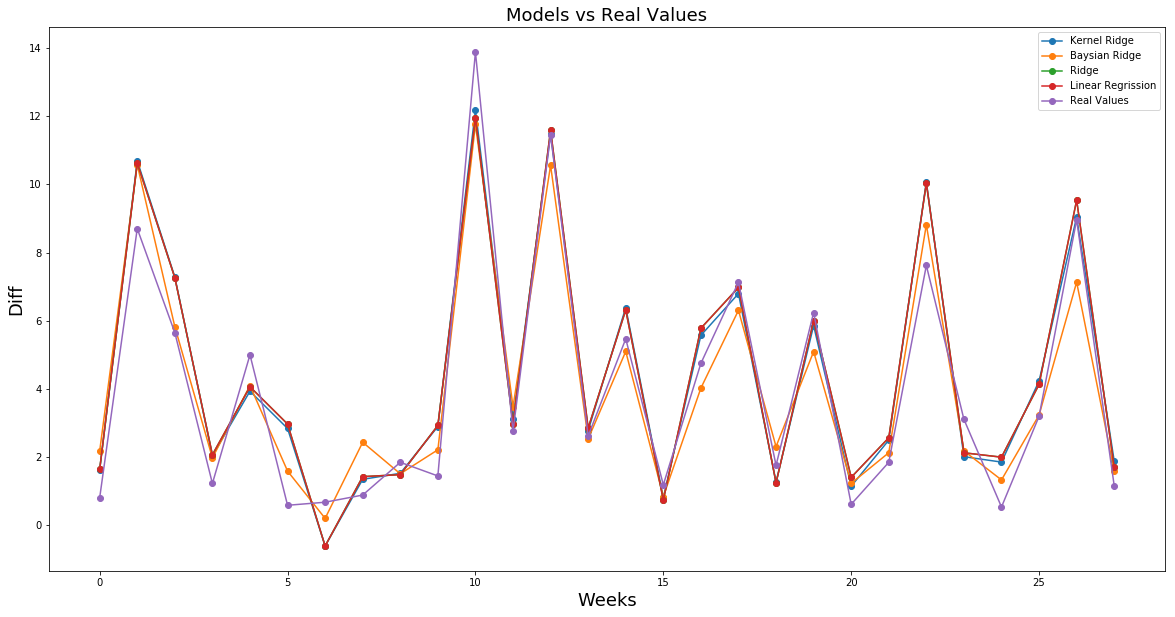

In [390]:
plt.figure(figsize=(20,10))
plt.plot([( row['Kernel Ridge'], row['Baysian Ridge'],
                row['Ridge'], row['Linear Regrission'],
                row['Real Values']
              ) for index, row in all_models.iterrows()], 'o-')
plt.xlabel('Weeks', fontsize=18)
plt.ylabel('Diff', fontsize=18)
plt.title('Models vs Real Values', fontsize=18)
plt.legend(['Kernel Ridge','Baysian Ridge','Ridge','Linear Regrission','Real Values'], fontsize=10, loc='upperleft')
plt.show()